# Fast Fourier Transform
## DFT

The discrete Fourier transform of a vector $\mathbf{y} = \left(y_0,y_1,...,y_{N-1}\right)$ is given by:

\begin{equation}
c_k = \sum_{n=0}^{N-1} y_n exp\left(\frac{-2\pi ikn}{N}\right) = \sum_{n=0}^{N-1} y_n \left[ cos \left(\frac{2\pi kn}{N}\right)-i\, sin \left(\frac{2\pi kn}{N}\right)\right].
\end{equation}

I will implement the right-most expression above in my code to avoid complex exponential problems.

In [1]:
from fft_class import fourier as ft
import numpy as np
import numpy.fft as fftw
import matplotlib.pyplot as plt
import random as rnd
import time as tm
%matplotlib inline

In [2]:
rnd.seed(0)
v = [rnd.random() for  i in range(2)]
vec = v.copy()
time = 0.
N = 0
StepList = list()
DFTList = list()
print("Started Fourier Transforming")
while time < 1.:
    N = len(vec)
    f = ft(vec)
    dft = f.dft()
    time = f.t
    vec += vec # double size of vector for next iteration
    StepList.append(N)
    DFTList.append(time)
    print("dft:\tN = ",N,"\tDFT = {:.5f} seconds".format(time))

Started Fourier Transforming
dft:	N =  2 	DFT = 0.00004 seconds
dft:	N =  4 	DFT = 0.00005 seconds
dft:	N =  8 	DFT = 0.00018 seconds
dft:	N =  16 	DFT = 0.00061 seconds
dft:	N =  32 	DFT = 0.00253 seconds
dft:	N =  64 	DFT = 0.00914 seconds
dft:	N =  128 	DFT = 0.03689 seconds
dft:	N =  256 	DFT = 0.14836 seconds
dft:	N =  512 	DFT = 0.51438 seconds
dft:	N =  1024 	DFT = 1.93328 seconds


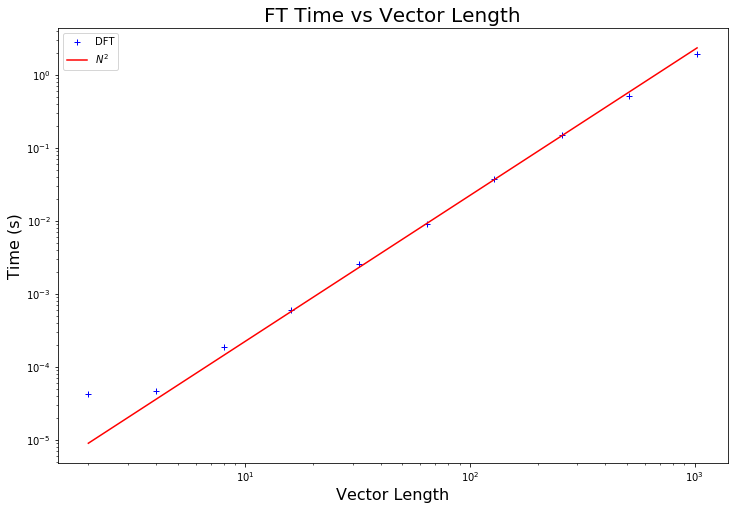

In [3]:
StepList = np.array(StepList)
mid = int(len(StepList)/2)
fig,axes = plt.subplots(figsize=(12,8))
axes.loglog(StepList,DFTList,'b+',label='DFT')
axes.loglog(StepList,(StepList**2)*(DFTList[mid]/(StepList[mid]**2)),'r',label='$N^2$')
axes.legend()
axes.set_title("FT Time vs Vector Length",fontsize=20)
axes.set_xlabel("Vector Length",fontsize=16)
axes.set_ylabel("Time (s)",fontsize=16)

We can see above that the DFT scales as $N^2$ as expected. The largest vector transformed in less than a second had 512 terms.

## FFT

In [4]:
vec = v.copy()
time = 0.
N = 0
StepList = list()
FFTList = list()
print("Started Fourier Transforming")
while time < 1.:
    N = len(vec)
    f = ft(vec)
    dft = f.fft()
    time = f.t
    vec += vec # double size of vector for next iteration
    StepList.append(N)
    FFTList.append(time)
    print("fft:\tN = ",N,"\tFFT = {:.6f} seconds".format(time))

Started Fourier Transforming
fft:	N =  2 	FFT = 0.000026 seconds
fft:	N =  4 	FFT = 0.000021 seconds
fft:	N =  8 	FFT = 0.000038 seconds
fft:	N =  16 	FFT = 0.000089 seconds
fft:	N =  32 	FFT = 0.000241 seconds
fft:	N =  64 	FFT = 0.000529 seconds
fft:	N =  128 	FFT = 0.000838 seconds
fft:	N =  256 	FFT = 0.002300 seconds
fft:	N =  512 	FFT = 0.005227 seconds
fft:	N =  1024 	FFT = 0.009883 seconds
fft:	N =  2048 	FFT = 0.021281 seconds
fft:	N =  4096 	FFT = 0.046574 seconds
fft:	N =  8192 	FFT = 0.095953 seconds
fft:	N =  16384 	FFT = 0.197139 seconds
fft:	N =  32768 	FFT = 0.418729 seconds
fft:	N =  65536 	FFT = 0.957751 seconds
fft:	N =  131072 	FFT = 2.144419 seconds


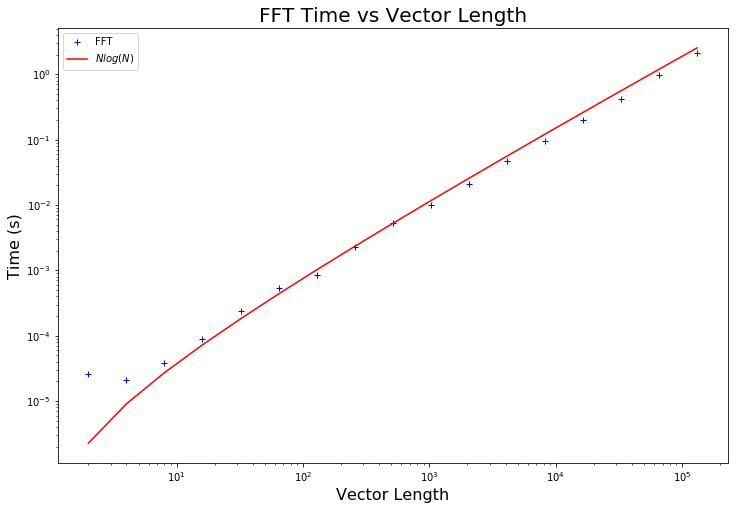

In [5]:
StepList = np.array(StepList)
mid = int(len(StepList)/2)
fig,axes = plt.subplots(figsize=(12,8))
axes.loglog(StepList,FFTList,'b+',label='FFT')
axes.loglog(StepList,\
            (StepList*np.log(StepList))*(FFTList[mid]/(StepList[mid]*np.log(StepList[mid]))),\
            'r',label='$Nlog(N)$')
axes.legend()
axes.set_title("FFT Time vs Vector Length",fontsize=20)
axes.set_xlabel("Vector Length",fontsize=16)
axes.set_ylabel("Time (s)",fontsize=16)

The Cooley-Tukey algorithm for a fast Fourier transform was covered in class. Essentially it uses the symmetry of the Fourier transform to break it into even and odd pieces that are half the length of the original transform. This can be applied to the sub-transforms as well. As we can see above, this algorithm significantly reduces the computation time. The computation follows the expected $Nlog(N)$ trend as expected. The largest vector transformed in less than 1 second had 65,536 terms.

## FFTW

I used

In [8]:
vec = v.copy()
time = 0.
N = 0
StepList = list()
FTList = list()
print("Started Fourier Transforming")
while time < 1.:
    N = len(vec)
    start = tm.time()
    fftw.fft(vec)
    time = tm.time()-start
    vec += vec # double size of vector for next iteration
    StepList.append(N)
    FTList.append(time)
    print("fftw:\tN = ",N,"\tFFTW = {:.6f} seconds".format(time))

Started Fourier Transforming
fftw:	N =  2 	FFTW = 0.000227 seconds
fftw:	N =  4 	FFTW = 0.000189 seconds
fftw:	N =  8 	FFTW = 0.000159 seconds
fftw:	N =  16 	FFTW = 0.000056 seconds
fftw:	N =  32 	FFTW = 0.000207 seconds
fftw:	N =  64 	FFTW = 0.000147 seconds
fftw:	N =  128 	FFTW = 0.000156 seconds
fftw:	N =  256 	FFTW = 0.000074 seconds
fftw:	N =  512 	FFTW = 0.000238 seconds
fftw:	N =  1024 	FFTW = 0.000495 seconds
fftw:	N =  2048 	FFTW = 0.000444 seconds
fftw:	N =  4096 	FFTW = 0.000896 seconds
fftw:	N =  8192 	FFTW = 0.001048 seconds
fftw:	N =  16384 	FFTW = 0.001749 seconds
fftw:	N =  32768 	FFTW = 0.003704 seconds
fftw:	N =  65536 	FFTW = 0.009382 seconds
fftw:	N =  131072 	FFTW = 0.019811 seconds
fftw:	N =  262144 	FFTW = 0.039992 seconds
fftw:	N =  524288 	FFTW = 0.073107 seconds
fftw:	N =  1048576 	FFTW = 0.113759 seconds
fftw:	N =  2097152 	FFTW = 0.287594 seconds
fftw:	N =  4194304 	FFTW = 0.559900 seconds
fftw:	N =  8388608 	FFTW = 1.091886 seconds


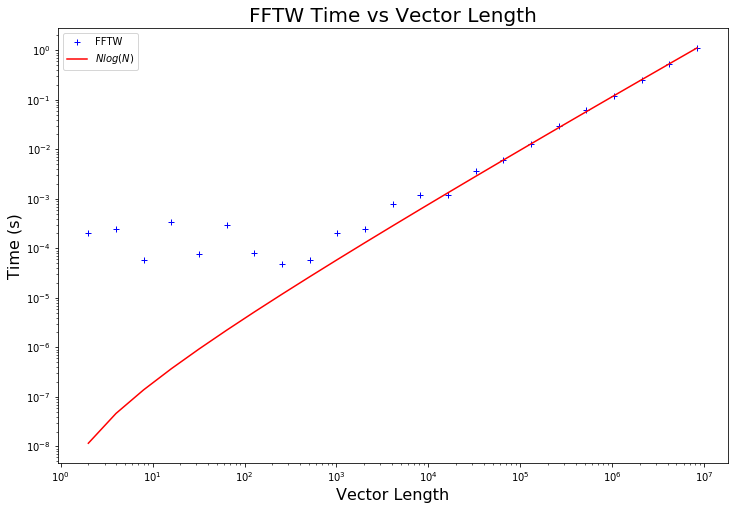

In [7]:
StepList = np.array(StepList)
mid = int(len(StepList)/2)
fig,axes = plt.subplots(figsize=(12,8))
axes.loglog(StepList,FTList,'b+',label='FFTW')
axes.loglog(StepList,\
            (StepList*np.log(StepList))*(FTList[-1]/(StepList[-1]*np.log(StepList[-1]))),\
            'r',label='$Nlog(N)$')
axes.legend()
axes.set_title("FFTW Time vs Vector Length",fontsize=20)
axes.set_xlabel("Vector Length",fontsize=16)
axes.set_ylabel("Time (s)",fontsize=16)

The plot of Numpy's FFT algorithm scaling is above. The largest vector transformed in under a second was 4,194,304 terms long. Once the computation time became non-negligible, we can see that it follows the $Nlog(N)$ scaling of the Cooley-Tukey algorithm. 